In [1]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Image Enhancement I: Intensity Level

In this task, we will implement following two methods which was taught in class:
1. Gamma modification
2. Histogram equalization

In [2]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-vfy73ac0
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.2-cp36-none-any.whl size=2313 sha256=766dbf54b6ee34964bea90d237525a3d584c93d4bc1f2a9a3dd623228eb0b2b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-a6gd0cxu/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-vfy73ac0


In [3]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=1) # download data for this assignment

Download Complete!


In [4]:
def gamma_modification(img, gamma=1):
    '''
    Write your program to apply gamma (power law) modification to input image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + gamma - gamma (power law) parameter
    
    Ouputs:
    + out_img - gamma modified grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    out_img = img.copy()/255
    out_img = 255*(out_img**gamma)
    out_img = out_img.astype('uint8')
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [5]:
def histogram_equalization_global(img):
    '''
    Write your program to equalise the intesnity level of the given image using histogram equalization method.
    In this one you have to use the global statistics of the image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + out_img - histogram equalized grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use np.histogram or any relevant numpy module
    + You are not allowed t use cv2.equalizeHist or any other direct implementations
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    input_shape = img.shape
    hist, bins = np.histogram(img.flatten(),np.arange(257),density=True)

    out_img = img.copy()
    for v in range(256):
      if v==0:
        out_img[img==v] = 0.0
      else:
        out_img[img==v] = 256*np.sum(hist[:v])

    out_img = out_img.astype('uint8')
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [6]:
def histogram_equalization_local(img, kernel_size=15):
    '''
    Write your program to equalise the intesnity level of the given image using histogram equalization method.
    In this one you have to use the global statistics of the image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be considered for
                  - the local statistics of the image
    
    Ouputs:
    + out_img - locally histogram equalized grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use np.histogram or any relevant numpy module
    + You are not allowed t use cv2.equalizeHist or any other direct implementations
    
    Hint:
    + Loop across all the points (i, j) in the input image and take [k, k] size window centered at (i, j). 
      Apply histogram_equalization_global() on the cropped window. Note you need to adjust your code for borders
    + Above mentioned method is not an efficient method and tiling method can be used but that will be
      more complex as you need to interpolate to get the final image.
    + Instead you can use incremental update.
    + Wiki link: https://en.wikipedia.org/wiki/Adaptive_histogram_equalization
    + All three method will award you same marks.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    pad_w = int(np.ceil(kernel_size/2))
    temp = np.pad(img,pad_w)
    temp1 = np.copy(temp)
    for i in range(pad_w,pad_w+img.shape[0]):
      for j in range(pad_w,pad_w+img.shape[1]):
        right = int((kernel_size-1)//2)
        left = kernel_size-1-right

        temp1[i,j] = histogram_equalization_global(temp[i-left:i+right+1,j-left:j+right+1])[left,left]

    out_img = (temp1[pad_w:pad_w+img.shape[0],pad_w:pad_w+img.shape[1]]).astype('uint8')
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Test

---

In [7]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

weeki_img = cv2.imread('data/gamma_modified_Weeki_Wachee_spring.jpg', 0)
hawkes_img = cv2.imread('data/Unequalized_Hawkes_Bay_NZ.jpg', 0)
tsukabi_l = cv2.imread('data/tsukuba_l.png', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------
#   Weeki Wachee
-------------------------


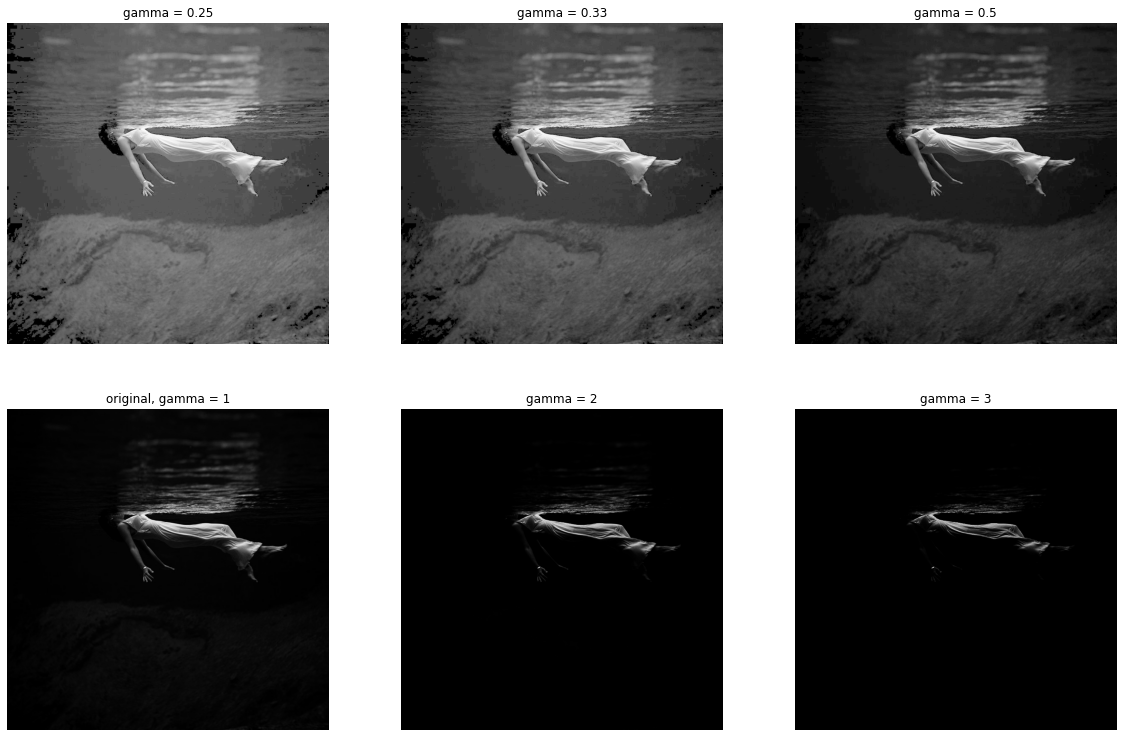


-------------------------
#   Hawkes Bay (NZ)
-------------------------


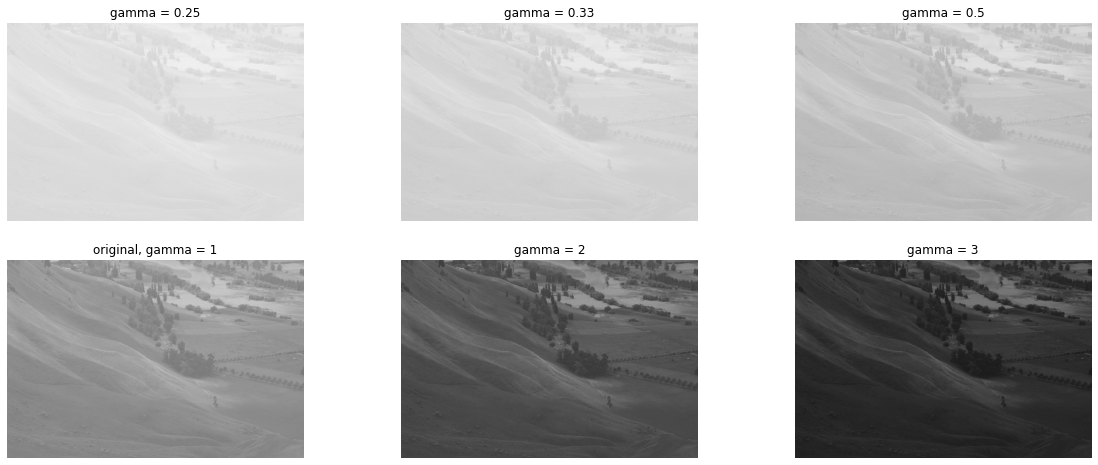

In [8]:
# Do not change codes inside this cell
# Add your observations in next cell

print("\n-------------------------")
print("#   Weeki Wachee")
print("-------------------------")
plt.figure(figsize=(20, 13))
count = 0
for i in [1/4, 1/3, 1/2, 1, 2, 3]:
    tmp_img = gamma_modification(np.copy(weeki_img), gamma=i)
    if i == 1:
        title = "original, gamma = 1"
    else:
        title = "gamma = " + str(round(i, 2))
        
    plot_frame(2, 3, count, tmp_img, title)
    count += 1
plt.show()

print("\n-------------------------")
print("#   Hawkes Bay (NZ)")
print("-------------------------")
plt.figure(figsize=(20, 8))
count = 0
for i in [1/4, 1/3, 1/2, 1, 2, 3]:
    tmp_img = gamma_modification(np.copy(hawkes_img), gamma=i)
    if i == 1:
        title = "original, gamma = 1"
    else:
        title = "gamma = " + str(round(i, 2))
        
    plot_frame(2, 3, count, tmp_img, title)
    count += 1
plt.show()


-------------------------
#    Tsukabi
-------------------------


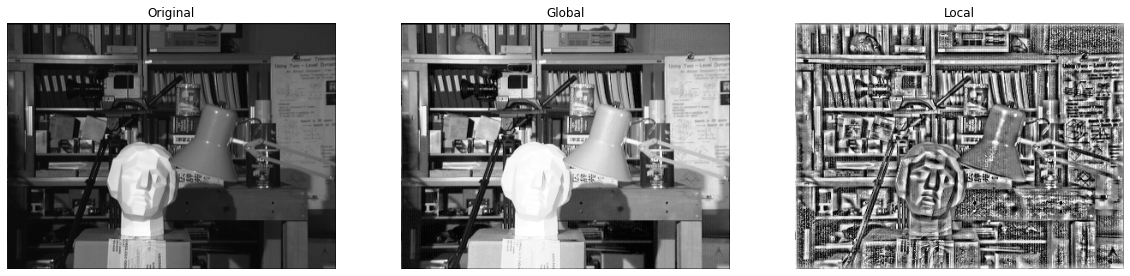


-------------------------
#    Hawkes Bay (NZ)
-------------------------


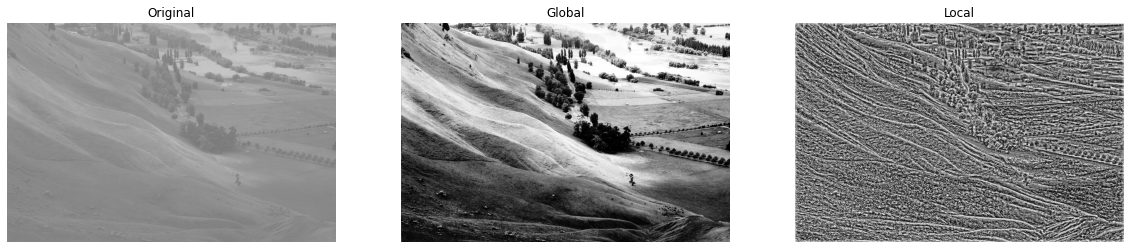


-------------------------
#    Weeki Wachee
-------------------------


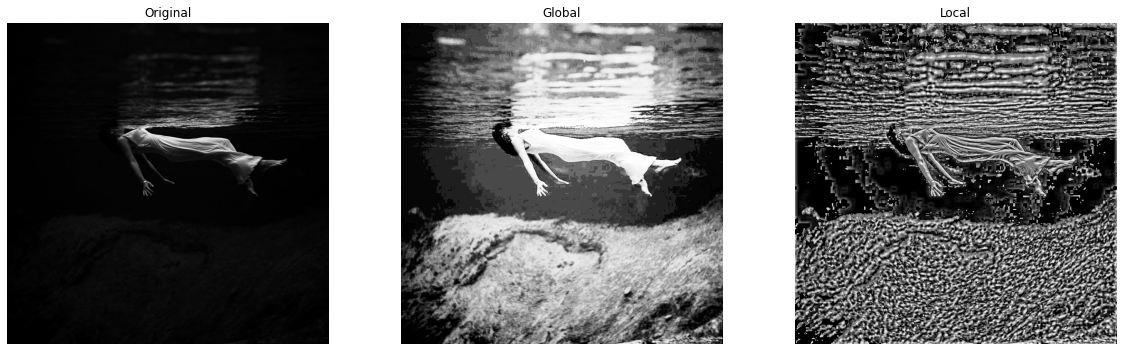

In [9]:
img_arr = [tsukabi_l, hawkes_img, weeki_img]
img_caption = ["Tsukabi", "Hawkes Bay (NZ)", "Weeki Wachee"]
for i in range(3):
    print("\n-------------------------")
    print("#   ", img_caption[i])
    print("-------------------------")
    
    plt.figure(figsize=(20, 13))
    plot_frame(2, 3, 0, img_arr[i], "Original")
    
    tmp_img = histogram_equalization_global(np.copy(img_arr[i]))
    plot_frame(2, 3, 1, tmp_img, "Global")
    
    tmp_img = histogram_equalization_local(np.copy(img_arr[i]))
    plot_frame(2, 3, 2, tmp_img, "Local")

    plt.show()

In [13]:
your_observation = """
Gamma is increasing/decreasing intensity levels irrespective of global or local neighbourhood consideration.
Thus although, it changes intensity levels, it doesn't have much effect on detailing in image.

On the other hand Histogram equalisation, also improves detailing in the image.
More preferrably, the work is done better by global HE, as it brings the whole image to life if one might say.
Whereas, local HE, focuses more on very fine detailing w.r.t. assigned kernel size.
But local HE, is not much use for global observation, instead will help in observations concerning local fine detailing.
"""

print(your_observation)


Gamma is increasing/decreasing intensity levels irrespective of global or local neighbourhood consideration.
Thus although, it changes intensity levels, it doesn't have much effect on detailing in image.

On the other hand Histogram equalisation, also improves detailing in the image.
More preferrably, the work is done better by global HE, as it brings the whole image to life if one might say.
Whereas, local HE, focuses more on very fine detailing w.r.t. assigned kernel size.
But local HE, is not much use for global observation, instead will help in observations concerning local fine detailing.



In [ ]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

img_arr = [tsukabi_l, hawkes_img, weeki_img]
gen_imgs = []

for i in range(3):
    for gamma in [1/4, 1/3, 1/2, 1, 2, 3]:
        tmp_img = gamma_modification(np.copy(img_arr[i]), gamma=gamma)
        gen_imgs.append(tmp_img)
        
    tmp_img = histogram_equalization_global(np.copy(img_arr[i]))
    gen_imgs.append(tmp_img)

    tmp_img = histogram_equalization_local(np.copy(img_arr[i]))
    gen_imgs.append(tmp_img)

task1_submission = np.array(gen_imgs)